<a href="https://colab.research.google.com/github/elineelorm/Capstone_ADLA_StoveOvenUse/blob/eline-boil_fry/MachineLearning/Training/Boil_Fry_LR.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Author: Eline Nuviadenu


In [ ]:
import numpy as np
import matplotlib.pyplot as plt 
import pandas as pd

In [ ]:
from google.colab import drive 

drive.mount('/content/drive')


Mounted at /content/drive


In [ ]:
path = "/content/drive/MyDrive/Capstone/TestDataWithId.csv"

dataset = pd.read_csv(path)
dataset = dataset.dropna()
dataset = dataset.reset_index()

print(dataset)


    index  id  stoveId  state  type  safety  time_elapsed_1  avg_pan_temp_1  \
0       0   1        1      1   0.0       0               0        5.058053   
1       1   2        1      1   1.0       0               0        6.970683   
2       2   3        1      1   1.0       0               0        4.223977   
3       3   4        1      1   0.0       0               0       14.654099   
4       4   5        1      1   1.0       0               0       16.012112   
5       5   6        1      1   0.0       0               0        4.728946   
6       6   7        1      1   1.0       0               0        7.990005   
7      28  29        1      1   1.0       0               0       28.145409   
8      33  34        2      1   1.0       0               0     -118.053902   
9      34  35        2      1   0.0       0               0        5.190693   
10     36  37        1      1   0.0       0               0       13.413377   
11     37  38        1      1   0.0       0         

In [ ]:
dataset_list = list(dataset.columns.values)

X = dataset[dataset_list[6:]]
y = dataset[dataset_list[4]].astype(int) # boiling 0 or frying 1

print(y)

0     0
1     1
2     1
3     0
4     1
5     0
6     1
7     1
8     1
9     0
10    0
11    0
12    1
13    0
14    0
15    1
16    0
17    0
18    1
19    1
20    0
21    0
22    0
23    1
24    1
25    0
26    0
Name: type, dtype: int64


In [ ]:
# 2 (confusion matrix stuff)
from sklearn.model_selection import KFold, cross_val_score
from sklearn.linear_model import LogisticRegression

model = LogisticRegression(solver='lbfgs',max_iter=150)
kfold = KFold(n_splits=5, shuffle=True)

cv_results = cross_val_score(model, X, y, cv=kfold, scoring='accuracy', verbose=10)

print(cv_results.mean(), cv_results.std())

[CV] START .....................................................................
[CV] END ................................ score: (test=1.000) total time=   0.0s
[CV] START .....................................................................
[CV] END ................................ score: (test=1.000) total time=   0.0s
[CV] START .....................................................................
[CV] END ................................ score: (test=1.000) total time=   0.0s
[CV] START .....................................................................
[CV] END ................................ score: (test=1.000) total time=   0.0s
[CV] START .....................................................................
[CV] END ................................ score: (test=1.000) total time=   0.0s
1.0 0.0


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    0.1s finished


Now, creating the confusion matrix 

In [ ]:
import copy as cp

import seaborn as sns
from typing import Tuple 
from sklearn.metrics import confusion_matrix

Calculate Predicted and Actual class

In [ ]:

def cross_val_predict(model, kfold, X, y):

    model_ = cp.deepcopy(model)
    
    no_classes = len(np.unique(y))
    
    actual_classes = np.empty([0], dtype=int)
    predicted_classes = np.empty([0], dtype=int)
    predicted_proba = np.empty([0, no_classes]) 

    for train_ndx, test_ndx in kfold.split(X):

        train_X, train_y, test_X, test_y = X[train_ndx], y[train_ndx], X[test_ndx], y[test_ndx]

        actual_classes = np.append(actual_classes, test_y)

        model_.fit(train_X, train_y)
        predicted_classes = np.append(predicted_classes, model_.predict(test_X))

        try:
            predicted_proba = np.append(predicted_proba, model_.predict_proba(test_X), axis=0)
        except:
            predicted_proba = np.append(predicted_proba, np.zeros((len(test_X), no_classes), dtype=float), axis=0)

    return model_, actual_classes, predicted_classes, predicted_proba

Visualise the matrix 

In [ ]:
def plot_confusion_matrix(actual_classes, predicted_classes, sorted_labels):

    matrix = confusion_matrix(actual_classes, predicted_classes, labels=[0, 1])
    
    plt.figure(figsize=(12.8,6))
    sns.set(font_scale=3)
    sns.heatmap(matrix, annot=True, xticklabels=sorted_labels, yticklabels=sorted_labels, cmap="Blues", fmt="g")
    plt.xlabel('Predicted', fontweight="bold")
    plt.ylabel('Actual', fontweight="bold") 
    plt.title('Confusion Matrix for Boiling and Frying Using Logistic Regression', fontsize=25, fontweight="bold", pad=20)
    
    plt.show()

calling the helper functions

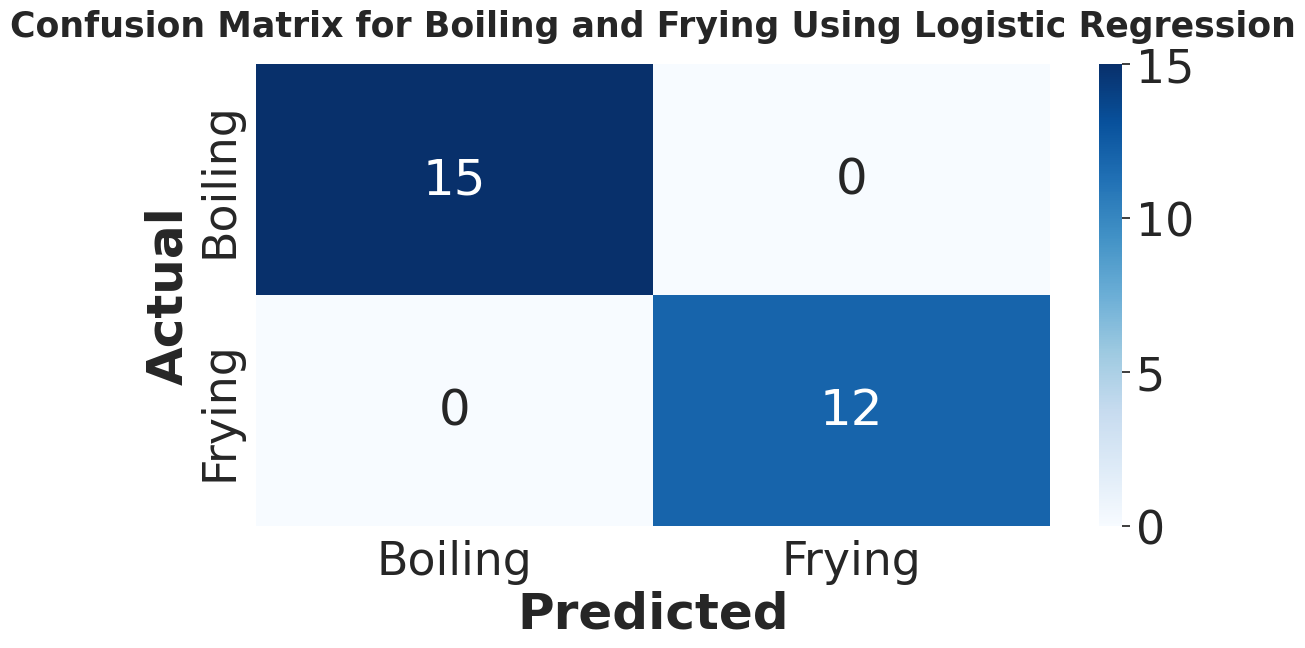

In [ ]:
trained_model, actual_classes, predicted_classes, _ = cross_val_predict(model, kfold, X.to_numpy(), y.to_numpy())
plot_confusion_matrix(actual_classes, predicted_classes, ["Boiling", "Frying"])

In [ ]:
import pickle

filename = 'FryBoil_LR.sav'
pickle.dump(trained_model, open(filename, 'wb'))